# Data understanding

## 1.Dataset Description

**Dataset description from Kaggle :**

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

**Content :**

This dataset consists of the following files:

**movies_metadata.csv**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**keywords.csv**: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

**credits.csv**: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

**links.csv**: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

**links_small.csv**: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

**ratings_small.csv**: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here: *https://grouplens.org/datasets/movielens/latest/*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

### movies_metadata dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/movies_metadata.csv')
df.head().transpose()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features:**

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id**: The ID of the move.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of **45,466 movies** with **24 features**. Most of the features have very few NaN values (apart from **homepage** and **tagline**).

### credits dataset

In [7]:
credits_df = pd.read_csv('/content/drive/MyDrive/BDA/input/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


**Features:**
* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

In [8]:
credits_df.shape

(45476, 3)

In [9]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### keywords dataset

In [10]:
keywords_df = pd.read_csv('/content/drive/MyDrive/BDA/input/keywords.csv')
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [11]:
keywords_df.shape

(46419, 2)

In [12]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


### IMDb movies dataset
IMDb movies extensive dataset

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

* The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

* The ratings dataset includes 85,855 rating details from demographic perspective.

* The names dataset includes 297,705 cast members with personal attributes such as birth details, death details, height, spouses, children, etc.

* The title principals dataset includes 835,513 cast members roles in movies with attributes such as IMDb title id, IMDb name id, order of importance in the movie, role, and characters played.

In [13]:
imdb_movies_df = pd.read_csv('/content/drive/MyDrive/BDA/input/IMDb movies.csv')
imdb_movies_df.head().transpose()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
imdb_title_id,tt0000009,tt0000574,tt0001892,tt0002101,tt0002130
title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
original_title,Miss Jerry,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno
year,1894,1906,1911,1912,1911
date_published,1894-10-09,1906-12-26,1911-08-19,1912-11-13,1911-03-06
genre,Romance,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy"
duration,45,70,53,100,68
country,USA,Australia,"Germany, Denmark",USA,Italy
language,None,None,NaN,English,Italian
director,Alexander Black,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan"


In [14]:
imdb_movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

* '**imdb_title_id**' : title ID on IMDb
* '**title**' : title name
* '**original_title**' : original title name
* '**year**' : year of release
* '**date_published**' : date of release
* '**genre**' : movie genre
* '**duration**' : duration (in minutes)
* '**country**' : movie country
* '**language**' : movie language
* '**director**' : director name
* '**writer**' : writer name
* '**production_company**' : production company
* '**actors**' : actor names
* '**description**' : plot descrption
* '**avg_vote**' : average vote
* '**votes**' : number of votes received
* '**budget**' : budget
* '**usa_gross_income**' : USA gross income
* '**worlwide_gross_income**' : worldwide gross income
* '**metascore**' : metascore rating
* '**reviews_from_users**' : number of reviews from users
* '**reviews_from_critics**' : number of reviews from critics

In [15]:
df.shape, imdb_movies_df.shape

((45466, 24), (85855, 22))

In [16]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Befor join, we drop the duplicated records.

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(45453, 24)

In [19]:
imdb_extend_df = pd.merge(df, imdb_movies_df, left_on="imdb_id", right_on="imdb_title_id", suffixes=('_tmdb', '_imdb'), how="left")

In [20]:
imdb_extend_df.shape

(45453, 46)

In [21]:
imdb_extend_df.drop_duplicates(inplace=True)

In [22]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45452
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget_tmdb            45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   homepage               7780 non-null   object 
 5   id                     45453 non-null  object 
 6   imdb_id                45436 non-null  object 
 7   original_language      45442 non-null  object 
 8   original_title_tmdb    45453 non-null  object 
 9   overview               44499 non-null  object 
 10  popularity             45448 non-null  object 
 11  poster_path            45067 non-null  object 
 12  production_companies   45450 non-null  object 
 13  production_countries   45450 non-null  object 
 14  release_date           45366 non-null  object 
 15  re

In [23]:
imdb_extend_df.isnull().sum()

adult                        0
belongs_to_collection    40959
budget_tmdb                  0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title_tmdb          0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title_tmdb                   6
video                        6
vote_average                 6
vote_count                   6
imdb_title_id            11367
title_imdb               11367
original_title_imdb      11367
year                     11367
date_published           11367
genre                    11367
duration                 11367
country                  11371
language

## 2.Data Cleaning
In this stage, we will clean our data by

handling missing information,
creating new features for analysis, and
converting fields to the correct format for calculations and presentation.

In [24]:
imdb_extend_df.isnull().sum()

adult                        0
belongs_to_collection    40959
budget_tmdb                  0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title_tmdb          0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title_tmdb                   6
video                        6
vote_average                 6
vote_count                   6
imdb_title_id            11367
title_imdb               11367
original_title_imdb      11367
year                     11367
date_published           11367
genre                    11367
duration                 11367
country                  11371
language

##### **adult:**

In [25]:
imdb_extend_df['adult'].value_counts()

False                                                                                                                             45441
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

There are close to **0 adult movies** in this dataset. The **adult** feature therefore is not of much use to us and can be safely dropped.

In [26]:
imdb_extend_df = imdb_extend_df.drop('adult', axis=1)

##### **belongs_to_collection:**
'belongs_to_collection' will be turned into a Boolean variable. 1 indicates a movie is a part of collection.

**TODO**: Add motivation later.


In [27]:
imdb_extend_df['belongs_to_collection'] = imdb_extend_df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)

##### **budget:**

In [28]:
imdb_extend_df["budget_imdb"].value_counts()

$ 5000000       371
$ 10000000      343
$ 2000000       338
$ 3000000       326
$ 1000000       323
               ... 
NOK 1200000       1
INR 32636250      1
$ 1312000         1
$ 1708000         1
$ 623000          1
Name: budget_imdb, Length: 2796, dtype: int64

In [29]:
imdb_extend_df[imdb_extend_df["budget_imdb"].str.startswith('$',na = "NaN")==False]["budget_imdb"]

40        GBP 6000000
81        GBP 1500000
95        EUR 2590000
229       CAD 2000000
281       GBP 3000000
             ...     
45350     AUD 5000000
45355     GBP 8746989
45356      GBP 220000
45366    UAH 15560000
45385     EUR 1070000
Name: budget_imdb, Length: 2761, dtype: object

In [30]:
imdb_extend_df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN      31740
True     10952
False     2761
Name: budget_imdb, dtype: int64

In [31]:
# Function to clean the budget_imdb
# Search for budget_imdb that not start with '$', fill with pd.NA
def Clean_budget_imdb(budget_imdb):
    if re.search('\$ \d+', budget_imdb):
        return budget_imdb
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
imdb_extend_df['budget_imdb'] = imdb_extend_df['budget_imdb'].astype(str).apply(Clean_budget_imdb)

In [32]:
imdb_extend_df.replace(imdb_extend_df[imdb_extend_df["budget_imdb"].str.startswith('^$')==True]["budget_imdb"], pd.NA, inplace=True)

In [33]:
imdb_extend_df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN     34501
True    10952
Name: budget_imdb, dtype: int64

In [34]:
imdb_extend_df["budget_imdb"] = imdb_extend_df["budget_imdb"].str.extract('(\d+)', expand=False)

In [35]:
imdb_extend_df['budget_tmdb'] = pd.to_numeric(imdb_extend_df['budget_tmdb'], errors='coerce')
imdb_extend_df['budget_tmdb'] = imdb_extend_df['budget_tmdb'].replace(0, np.nan)
imdb_extend_df['budget_imdb'] = imdb_extend_df['budget_imdb'].replace(0, np.nan)
imdb_extend_df[imdb_extend_df['budget_tmdb'].isnull()].shape

(36564, 45)

In [36]:
imdb_extend_df["budget_tmdb"] = imdb_extend_df['budget_tmdb'].fillna(imdb_extend_df['budget_imdb'])
imdb_extend_df[imdb_extend_df['budget_tmdb'].isnull()].shape

(32276, 45)

After fill in the na value in 'budget_tmdb', we can drop 'budget_imdb'

In [37]:
imdb_extend_df = imdb_extend_df.drop('budget_imdb', axis=1)

In [38]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [39]:
imdb_extend_df['budget_tmdb'] = imdb_extend_df['budget_tmdb'].apply(clean_numeric).astype('float')

##### **genres:**
genres will be converted into number of genres.

In [40]:
imdb_extend_df[['genres','genre']].isnull().sum()

genres        0
genre     11367
dtype: int64

In [41]:
imdb_extend_df['genres'] = imdb_extend_df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [42]:
imdb_extend_df['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45448                 [Drama, Family]
45449                         [Drama]
45450       [Action, Drama, Thriller]
45451                              []
45452                              []
Name: genres, Length: 45453, dtype: object

In [43]:
imdb_extend_df[imdb_extend_df['genres'].str.len()==0]['genres']

55       []
83       []
126      []
137      []
390      []
         ..
45434    []
45435    []
45442    []
45451    []
45452    []
Name: genres, Length: 2442, dtype: object

In [44]:
imdb_extend_df['genres'] = imdb_extend_df['genres'].apply(lambda x: np.nan if len(x)==0 else x)

In [45]:
imdb_extend_df[['genres','genre']].isnull().sum()

genres     2442
genre     11367
dtype: int64

In [46]:
imdb_extend_df[['genres','genre']].head()

,genres,genre
0,"[Animation, Comedy, Family]","Animation, Adventure, Comedy"
1,"[Adventure, Fantasy, Family]","Adventure, Comedy, Family"
2,"[Romance, Comedy]","Comedy, Romance"
3,"[Comedy, Drama, Romance]","Comedy, Drama, Romance"
4,[Comedy],"Comedy, Family, Romance"


In [47]:
imdb_extend_df[imdb_extend_df['genres'].isnull()][['genres','genre']]

,genres,genre
55,NaN,"Adventure, Comedy, Family"
83,NaN,"Comedy, Drama"
126,NaN,NaN
137,NaN,NaN
390,NaN,"Drama, Mystery, Romance"
...,...,...
45434,NaN,NaN
45435,NaN,NaN
45442,NaN,"Drama, History"
45451,NaN,Drama


In [48]:
imdb_extend_df['genre'] =  imdb_extend_df['genre'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [49]:
imdb_extend_df['genre'] = imdb_extend_df['genre'].apply(lambda x: [] if x==['nan'] else x)

In [50]:
imdb_extend_df['genres'] = imdb_extend_df['genres'].fillna(imdb_extend_df['genre'])

In [51]:
imdb_extend_df[imdb_extend_df['genres'].str.len()==0]['genres']

126      []
137      []
595      []
671      []
685      []
         ..
45374    []
45429    []
45434    []
45435    []
45452    []
Name: genres, Length: 1257, dtype: object

Drop gener from imdb dataset.

In [52]:
imdb_extend_df = imdb_extend_df.drop('genre', axis=1)

In [53]:
# Inorder to count genre
s = imdb_extend_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [54]:
gen_df = imdb_extend_df.drop('genres', axis=1).join(s)

In [55]:
gen_df['genre_list']

0        Animation
0           Comedy
0           Family
1        Adventure
1          Fantasy
           ...    
45450       Action
45450        Drama
45450     Thriller
45451        Drama
45452          NaN
Name: genre_list, Length: 94515, dtype: object

In [56]:
gen_df['genre_list'].value_counts().shape[0]

37

In [57]:
genres_train = gen_df['genre_list'].drop_duplicates()

In [58]:
for genre in genres_train:
  print(genre)

Animation
Comedy
Family
Adventure
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
History
Science Fiction
Mystery
War
Foreign
Music
Documentary
nan
Western
TV Movie
Musical
Biography
Film-Noir
Sport
Carousel Productions
Vision View Entertainment
Telescene Film Group Productions
Sci-Fi
Aniplex
GoHands
BROSTA TV
Mardock Scramble Production Committee
Sentai Filmworks
Odyssey Media
Pulser Productions
Rogue State
The Cartel


In [59]:
for genre in genres_train:
  imdb_extend_df['is_' + str(genre)] = imdb_extend_df['genres'].apply(lambda x: 1 if genre in x else 0)
#imdb_extend_df['genres'] = imdb_extend_df['genres'].apply(lambda x: len(x))
imdb_extend_df['genres_size'] = imdb_extend_df['genres'].apply(lambda x: len(x))

In [60]:
pop_gen = pd.DataFrame(gen_df['genre_list'].value_counts()).reset_index()
pop_gen.columns = ['genre_list', 'movies']
pop_gen.head(10)

,genre_list,movies
0,Drama,21028
1,Comedy,13627
2,Thriller,7709
3,Romance,6943
4,Action,6708
5,Horror,4707
6,Crime,4439
7,Documentary,3932
8,Adventure,3549
9,Science Fiction,3046


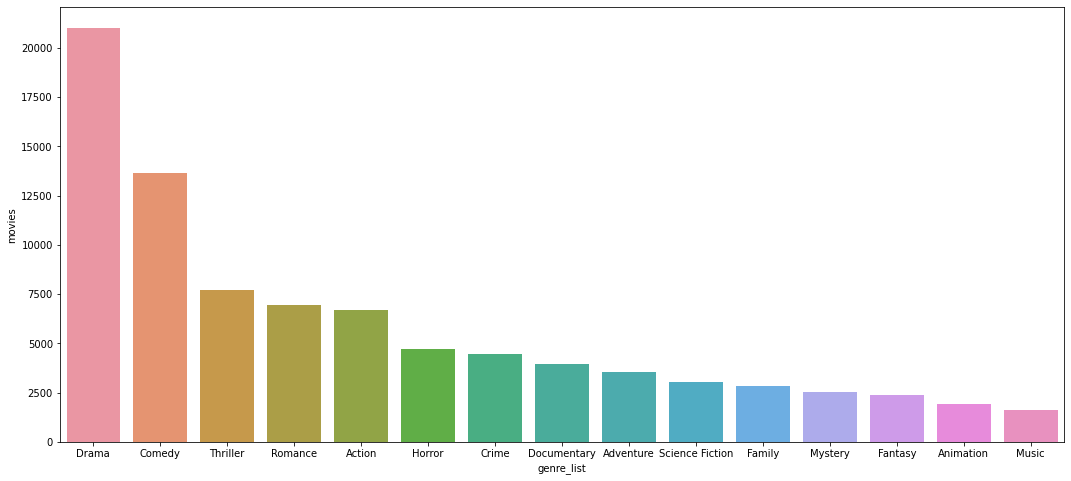

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

##### **homepage:**
'homepage' will be converted into a Boolean variable that will indicate if a movie has a homepage or not.

**TODO**: Add motivation later.

In [62]:
imdb_extend_df['homepage'] = imdb_extend_df['homepage'].apply(lambda x: 0 if x == np.nan else 1)

##### **id:**

In [63]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [64]:
imdb_extend_df['id'] = imdb_extend_df['id'].apply(convert_int)

In [65]:
imdb_extend_df[imdb_extend_df['id'].isnull()]

,belongs_to_collection,budget_tmdb,genres,homepage,id,imdb_id,original_language,original_title_tmdb,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_tmdb,video,vote_average,vote_count,imdb_title_id,title_imdb,original_title_imdb,year,date_published,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,usa_gross_income,worlwide_gross_income,...,reviews_from_critics,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Romance,is_Drama,is_Action,is_Crime,is_Thriller,is_Horror,is_History,is_Science Fiction,is_Mystery,is_War,is_Foreign,is_Music,is_Documentary,is_nan,is_Western,is_TV Movie,is_Musical,is_Biography,is_Film-Noir,is_Sport,is_Carousel Productions,is_Vision View Entertainment,is_Telescene Film Group Productions,is_Sci-Fi,is_Aniplex,is_GoHands,is_BROSTA TV,is_Mardock Scramble Production Committee,is_Sentai Filmworks,is_Odyssey Media,is_Pulser Productions,is_Rogue State,is_The Cartel,genres_size
19725,1,NaN,"[Carousel Productions, Vision View Entertainme...",1,NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3
29491,1,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",1,NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,5
35575,1,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",1,NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,4


In [66]:
imdb_extend_df.dropna(subset=['id'], inplace=True)

In [67]:
imdb_extend_df['id'] = imdb_extend_df['id'].astype('int')

##### **imdb_id:**
After merge the imdb dataset, we can drop 'imdb_id' and 'imdb_title_id'.

In [68]:
imdb_extend_df = imdb_extend_df.drop(["imdb_id", "imdb_title_id"], axis=1)

##### **original_language:** 
original_language will be replaced by a feature called **is_English** to denote if a particular film is in English or another Language.

**TODO**: Add motivation later.

In [69]:
imdb_extend_df['is_english'] = imdb_extend_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
imdb_extend_df = imdb_extend_df.drop('original_language', axis=1)

##### **original_title:**

In [70]:
imdb_extend_df[['original_title_tmdb','original_title_imdb']].isnull().sum()

original_title_tmdb        0
original_title_imdb    11364
dtype: int64

No need the original_title from imdb, drop it.

In [71]:
imdb_extend_df = imdb_extend_df.drop("original_title_imdb", axis=1)

In [72]:
imdb_extend_df[imdb_extend_df['original_title_tmdb'] != imdb_extend_df['title_tmdb']][['title_tmdb', 'original_title_tmdb']].head()

,title_tmdb,original_title_tmdb
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so.

In [73]:
imdb_extend_df = imdb_extend_df.drop('original_title_tmdb', axis=1)

##### **overview:**

In [74]:
imdb_extend_df[['overview','description']].head()

,overview,description
0,"Led by Woody, Andy's toys live happily in his ...",A cowboy doll is profoundly threatened and jea...
1,When siblings Judy and Peter discover an encha...,When two kids find and play a magical board ga...
2,A family wedding reignites the ancient feud be...,John and Max resolve to save their beloved bai...
3,"Cheated on, mistreated and stepped on, the wom...","Based on Terry McMillan's novel, this film fol..."
4,Just when George Banks has recovered from his ...,George Banks must deal not only with the pregn...


In [75]:
imdb_extend_df[['overview','description']].iloc[0, 0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [76]:
imdb_extend_df[['overview','description']].iloc[0, 1]

"A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room."

In [77]:
imdb_extend_df[['overview','description']].isnull().sum()

overview         954
description    11589
dtype: int64

In [78]:
imdb_extend_df[imdb_extend_df['overview'].isnull() & ~imdb_extend_df['description'].isnull()][['overview','description']]

,overview,description
32,NaN,"While flying mail across the Andean mountains,..."
300,NaN,An elderly yet young-at-heart man moves in wit...
634,NaN,Peanuts - The bank pays everything.
641,NaN,Franziska is kind of a romantic woman with two...
679,NaN,Individual memories of a group of teenage Holo...
...,...,...
45300,NaN,As high school students put on a politically-e...
45328,NaN,The unemployed Duval is contacted by a mysteri...
45385,NaN,The love rebels are ready for battle. Satu and...
45386,NaN,Tim and Dan - fellow losers from a provincial ...


In [79]:
imdb_extend_df["overview"] = imdb_extend_df['overview'].fillna(imdb_extend_df['description'])
imdb_extend_df[imdb_extend_df['overview'].isnull()].shape

(393, 78)

In [80]:
imdb_extend_df = imdb_extend_df.drop('description', axis=1)

##### **Popularity:**

In [81]:
imdb_extend_df['popularity'].isnull().sum()

3

In [82]:
imdb_extend_df[imdb_extend_df['popularity'].isnull()]['title_tmdb']

19724    NaN
29490    NaN
35574    NaN
Name: title_tmdb, dtype: object

In [83]:
imdb_extend_df.dropna(subset=['popularity'], inplace=True)

In [84]:
imdb_extend_df['popularity'].isnull().sum()

0

In [85]:
imdb_extend_df['popularity'] = imdb_extend_df['popularity'].astype('float')

In [86]:
imdb_extend_df['popularity'].describe()

count    45447.000000
mean         2.921534
std          6.006039
min          0.000000
25%          0.385945
50%          1.127513
75%          3.679022
max        547.488298
Name: popularity, dtype: float64

#####**poster_path:**
Useless feature, drop it.

In [87]:
imdb_extend_df = imdb_extend_df.drop('poster_path', axis=1)

##### **production_companies:**

In [88]:
imdb_extend_df[['production_companies','production_company']].isnull().sum()

production_companies        0
production_company      11989
dtype: int64

In [89]:
imdb_extend_df['production_companies'] = imdb_extend_df['production_companies'].fillna('[]').apply(ast.literal_eval)
imdb_extend_df['production_companies'] = imdb_extend_df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [90]:
imdb_extend_df[imdb_extend_df['production_companies'].str.len()==0]['production_companies']

50       []
52       []
57       []
58       []
83       []
         ..
45439    []
45442    []
45444    []
45448    []
45452    []
Name: production_companies, Length: 11872, dtype: object

In [91]:
imdb_extend_df['production_companies'] = imdb_extend_df['production_companies'].apply(lambda x: np.nan if len(x)==0 else x)

In [92]:
imdb_extend_df[imdb_extend_df['production_companies'].isnull()][['production_companies','production_company']]

,production_companies,production_company
50,NaN,NaN
52,NaN,NaN
57,NaN,Cecchi Gori Group Tiger Cinematografica
58,NaN,Canal+ Productions
83,NaN,Jagtoria Films
...,...,...
45439,NaN,NaN
45442,NaN,Ager Cinematografica
45444,NaN,NaN
45448,NaN,NaN


In [93]:
imdb_extend_df['production_companies'].isnull().sum()

11872

In [94]:
imdb_extend_df['production_company'].isnull().sum()

11989

In [95]:
imdb_extend_df['production_company'] =  imdb_extend_df['production_company'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [96]:
imdb_extend_df['production_company'] = imdb_extend_df['production_company'].apply(lambda x: [] if x==['nan'] else x)

In [97]:
imdb_extend_df['production_companies'] = imdb_extend_df['production_companies'].fillna(imdb_extend_df['production_company'])

In [98]:
imdb_extend_df[imdb_extend_df['production_companies'].str.len()==0]['production_companies']

50       []
52       []
106      []
114      []
119      []
         ..
45429    []
45439    []
45444    []
45448    []
45452    []
Name: production_companies, Length: 5630, dtype: object

In [99]:
#imdb_extend_df['production_companies'] = imdb_extend_df['production_companies'].apply(lambda x: len(x))
imdb_extend_df['production_companies_size'] = imdb_extend_df['production_companies'].apply(lambda x: len(x))

In [100]:
imdb_extend_df = imdb_extend_df.drop('production_company', axis=1)

##### **production_countries:**

In [101]:
imdb_extend_df[['production_countries','country']].isnull().sum()

production_countries        0
country                 11367
dtype: int64

In [102]:
imdb_extend_df['production_countries'] = imdb_extend_df['production_countries'].fillna('[]').apply(ast.literal_eval)
imdb_extend_df['production_countries'] = imdb_extend_df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [103]:
imdb_extend_df[imdb_extend_df['production_countries'].str.len()==0]['production_countries']

50       []
55       []
83       []
106      []
107      []
         ..
45419    []
45421    []
45425    []
45442    []
45444    []
Name: production_countries, Length: 6280, dtype: object

In [104]:
imdb_extend_df['production_countries'] = imdb_extend_df['production_countries'].apply(lambda x: np.nan if len(x)==0 else x)

In [105]:
imdb_extend_df[imdb_extend_df['production_countries'].isnull()][['production_countries','country']]

,production_countries,country
50,NaN,NaN
55,NaN,"USA, Canada"
83,NaN,USA
106,NaN,NaN
107,NaN,USA
...,...,...
45419,NaN,NaN
45421,NaN,"France, Italy, USA"
45425,NaN,Netherlands
45442,NaN,Italy


In [106]:
imdb_extend_df['production_countries'].isnull().sum()

6280

In [107]:
imdb_extend_df['country'].isnull().sum()

11367

In [108]:
imdb_extend_df['country'] =  imdb_extend_df['country'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [109]:
imdb_extend_df['country'] = imdb_extend_df['country'].apply(lambda x: [] if x==['nan'] else x)

In [110]:
imdb_extend_df['production_countries'] = imdb_extend_df['production_countries'].fillna(imdb_extend_df['country'])

In [111]:
imdb_extend_df[imdb_extend_df['production_countries'].str.len()==0]['production_countries']

50       []
106      []
126      []
137      []
189      []
         ..
45378    []
45410    []
45418    []
45419    []
45444    []
Name: production_countries, Length: 3292, dtype: object

In [112]:
imdb_extend_df['production_countries'] = imdb_extend_df['production_countries'].apply(lambda x: len(x))

In [113]:
imdb_extend_df = imdb_extend_df.drop('country', axis=1)

##### **release_date:**
Release Dates can often play a very important role in determining the success and the revenue generated by a particular movie. In this section, we will try and gain insights about release dates in terms of years, months and days of the week. 

We have already constructed the **year** feature in our preliminary data wrangling step. Let us now extract the month and day too for each movie with a release date.

In [114]:
imdb_extend_df[['release_date','date_published']].isnull().sum()

release_date         84
date_published    11363
dtype: int64

In [115]:
imdb_extend_df[['release_date','date_published']]

,release_date,date_published
0,1995-10-30,1996-03-22
1,1995-12-15,1996-02-23
2,1995-12-22,1996-04-18
3,1995-12-22,1996-01-18
4,1995-02-10,1996-02-02
...,...,...
45448,NaN,2017-06-17
45449,2011-11-17,2011-09-09
45450,2003-08-01,2003-08-01
45451,1917-10-21,1917-10-21


In [116]:
imdb_extend_df[imdb_extend_df['release_date'].isnull()][['release_date','date_published']]

,release_date,date_published
711,NaN,NaN
734,NaN,NaN
3459,NaN,NaN
3627,NaN,2000-06-21
5878,NaN,NaN
...,...,...
45135,NaN,NaN
45190,NaN,NaN
45325,NaN,NaN
45397,NaN,2002-02-08


In [117]:
imdb_extend_df['release_date'] = imdb_extend_df['release_date'].fillna(imdb_extend_df['date_published'])

In [118]:
imdb_extend_df[['release_date','date_published']].isnull().sum()

release_date         71
date_published    11363
dtype: int64

In [119]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [120]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [121]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [122]:
imdb_extend_df['year'] = pd.to_datetime(imdb_extend_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
imdb_extend_df['day'] = imdb_extend_df['release_date'].apply(get_day)
imdb_extend_df['month'] = imdb_extend_df['release_date'].apply(get_month)

In [123]:
imdb_extend_df[['day','month']]

,day,month
0,Mon,Oct
1,Fri,Dec
2,Fri,Dec
3,Fri,Dec
4,Fri,Feb
...,...,...
45448,Sat,Jun
45449,Thu,Nov
45450,Fri,Aug
45451,Sun,Oct


In [124]:
imdb_extend_df = imdb_extend_df.drop(['date_published','release_date'], axis=1)

In [125]:
imdb_extend_df['is_Friday'] = imdb_extend_df['day'].apply(lambda x: 1 if x=='Fri' else 0)
imdb_extend_df['is_Holiday'] = imdb_extend_df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
#imdb_extend_df = pd.get_dummies(imdb_extend_df, prefix='is')

##### **revenue:**

In [126]:
imdb_extend_df['revenue'].isnull().sum()

0

In [127]:
imdb_extend_df[imdb_extend_df['revenue'] == 0].shape

(38041, 77)

We see that the majority of the movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [128]:
imdb_extend_df['revenue'] = imdb_extend_df['revenue'].replace(0, np.nan)

In [129]:
imdb_extend_df[['revenue', 'worlwide_gross_income']].head()

,revenue,worlwide_gross_income
0,373554033.0,$ 404265438
1,262797249.0,$ 262821940
2,NaN,$ 71518503
3,81452156.0,$ 81452156
4,76578911.0,$ 76594107


In [130]:
imdb_extend_df['worlwide_gross_income'].value_counts()

$ 8144         15
$ 46808        10
$ 509           9
$ 97182         6
$ 14000000      5
               ..
$ 2282899       1
$ 13025034      1
$ 19120         1
$ 306941670     1
$ 31575877      1
Name: worlwide_gross_income, Length: 17329, dtype: int64

In [131]:
imdb_extend_df[imdb_extend_df["worlwide_gross_income"].str.startswith('$',na = "NaN")==False]["worlwide_gross_income"]

18978    INR 500000000
31483     INR 33105600
31780    INR 360000000
33155    INR 350000000
34944    INR 600000000
37023    INR 390000000
37025    INR 180800000
38248    INR 550000000
38514    INR 510000000
39285    INR 232700000
44413    INR 500000000
45235    INR 250000000
45236    INR 440000000
Name: worlwide_gross_income, dtype: object

In [132]:
imdb_extend_df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

NaN      27936
True     17498
False       13
Name: worlwide_gross_income, dtype: int64

In [133]:
# Function to clean the worlwide_gross_income
# Search for worlwide_gross_income that not start with '$', fill with pd.NA
def Clean_worlwide_gross_income(worlwide_gross_income):
    if re.search('\$ \d+', worlwide_gross_income):
        return worlwide_gross_income
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
imdb_extend_df['worlwide_gross_income'] = imdb_extend_df['worlwide_gross_income'].astype(str).apply(Clean_worlwide_gross_income)

In [134]:
imdb_extend_df.replace(imdb_extend_df[imdb_extend_df["worlwide_gross_income"].str.startswith('^$')==True]["worlwide_gross_income"], pd.NA, inplace=True)

In [135]:
imdb_extend_df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

NaN     27949
True    17498
Name: worlwide_gross_income, dtype: int64

In [136]:
imdb_extend_df["worlwide_gross_income"] = imdb_extend_df["worlwide_gross_income"].str.extract('(\d+)', expand=False)

In [137]:
imdb_extend_df['revenue'] = pd.to_numeric(imdb_extend_df['revenue'], errors='coerce')
imdb_extend_df['revenue'] = imdb_extend_df['revenue'].replace(0, np.nan)
imdb_extend_df['worlwide_gross_income'] = imdb_extend_df['worlwide_gross_income'].replace(0, np.nan)
imdb_extend_df[imdb_extend_df['revenue'].isnull()].shape

(38041, 77)

In [138]:
imdb_extend_df["revenue"] = imdb_extend_df['revenue'].fillna(imdb_extend_df['worlwide_gross_income'])
imdb_extend_df[imdb_extend_df['revenue'].isnull()].shape

(27132, 77)

In [139]:
imdb_extend_df = imdb_extend_df.drop(['worlwide_gross_income','usa_gross_income'], axis=1)

In [140]:
imdb_extend_df['revenue'] = imdb_extend_df['revenue'].apply(clean_numeric).astype('float')

##### **runtime:**

In [141]:
imdb_extend_df[['runtime','duration']].isnull().sum()

runtime       257
duration    11363
dtype: int64

In [142]:
imdb_extend_df[imdb_extend_df['runtime'] == 0].shape

(1558, 75)

In [143]:
imdb_extend_df[imdb_extend_df['duration'] == 0].shape

(0, 75)

In [144]:
imdb_extend_df['runtime'] = imdb_extend_df['runtime'].replace(0, np.nan)

In [145]:
imdb_extend_df[['runtime','duration']].isnull().sum()

runtime      1815
duration    11363
dtype: int64

In [146]:
imdb_extend_df[['runtime','duration']].head()

,runtime,duration
0,81.0,81.0
1,104.0,104.0
2,101.0,101.0
3,127.0,124.0
4,106.0,106.0


In [147]:
imdb_extend_df["runtime"] = imdb_extend_df['runtime'].fillna(imdb_extend_df['duration'])

In [148]:
imdb_extend_df[['runtime','duration']].isnull().sum()

runtime       729
duration    11363
dtype: int64

Fill missing value with mean.

In [149]:
imdb_extend_df['runtime'] = imdb_extend_df['runtime'].fillna(imdb_extend_df['runtime'].mean())

In [150]:
imdb_extend_df[['runtime']].isnull().sum()

runtime    0
dtype: int64

In [151]:
imdb_extend_df = imdb_extend_df.drop('duration', axis=1)

##### **spoken_languages:**

In [152]:
imdb_extend_df[['spoken_languages', 'language']].isnull().sum()

spoken_languages        0
language            11542
dtype: int64

In [153]:
imdb_extend_df['spoken_languages'] = imdb_extend_df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
imdb_extend_df['spoken_languages'] = imdb_extend_df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [154]:
imdb_extend_df[imdb_extend_df['spoken_languages'].str.len()==0]['spoken_languages']

50       []
83       []
107      []
126      []
137      []
         ..
45430    []
45433    []
45434    []
45435    []
45451    []
Name: spoken_languages, Length: 3827, dtype: object

In [155]:
imdb_extend_df['spoken_languages'] = imdb_extend_df['spoken_languages'].apply(lambda x: np.nan if len(x)==0 else x)

In [156]:
imdb_extend_df[imdb_extend_df['spoken_languages'].isnull()][['spoken_languages','language']]

,spoken_languages,language
50,NaN,NaN
83,NaN,English
107,NaN,English
126,NaN,NaN
137,NaN,NaN
...,...,...
45430,NaN,NaN
45433,NaN,NaN
45434,NaN,NaN
45435,NaN,NaN


In [157]:
imdb_extend_df['spoken_languages'].isnull().sum()

3827

In [158]:
imdb_extend_df['language'].isnull().sum()

11542

In [159]:
imdb_extend_df['language'] =  imdb_extend_df['language'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [160]:
imdb_extend_df['language'] = imdb_extend_df['language'].apply(lambda x: [] if x==['nan'] else x)

In [161]:
imdb_extend_df['spoken_languages'] = imdb_extend_df['spoken_languages'].fillna(imdb_extend_df['language'])

In [162]:
imdb_extend_df[imdb_extend_df['spoken_languages'].str.len()==0]['spoken_languages']

50       []
126      []
137      []
189      []
393      []
         ..
45430    []
45433    []
45434    []
45435    []
45451    []
Name: spoken_languages, Length: 2225, dtype: object

In [163]:
imdb_extend_df['spoken_languages'] = imdb_extend_df['spoken_languages'].apply(lambda x: len(x))

In [164]:
imdb_extend_df['spoken_languages'].value_counts()

1     35143
2      5504
0      2225
3      1741
4       560
5       181
6        62
7        14
8         7
9         6
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [165]:
imdb_extend_df = imdb_extend_df.drop('language', axis=1)

##### **status:**

Although not entirely relevant to our analysis of movies, gathering information on the various kinds of movies based on their status of release can provide us interesitng insight on the nature of the movies present in our dataset. My preliminary hunch was that almost every movie has the **Released** status. Let's find out.

In [166]:
imdb_extend_df['status'].value_counts()

Released           45002
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. We might take this information into account while building our collaborative filtering recommendation engine.

In [167]:
imdb_extend_df = imdb_extend_df.drop('status', axis=1)

##### **tagline:**

In [168]:
imdb_extend_df['tagline'].isnull().sum()

25039

##### **title:**

In [169]:
imdb_extend_df[['title_tmdb','title_imdb']].isnull().sum()

title_tmdb        0
title_imdb    11363
dtype: int64

In [170]:
imdb_extend_df = imdb_extend_df.drop('title_imdb', axis=1)

#####**video:**

In [171]:
imdb_extend_df['video'].value_counts()

False    45354
True        93
Name: video, dtype: int64

In [172]:
imdb_extend_df = imdb_extend_df.drop('video', axis=1)

Almost all the movies didn't have a video on tmdb.

##### **vote_average:**

In [173]:
imdb_extend_df['vote_average'].isnull().sum()

0

In [174]:
imdb_extend_df[imdb_extend_df['vote_average'] == 0].shape

(2997, 70)

In [175]:
imdb_extend_df['vote_average'] = imdb_extend_df['vote_average'].replace(0, np.nan)

In [176]:
imdb_extend_df['vote_average'] = imdb_extend_df['vote_average'].fillna(imdb_extend_df['vote_average'].mean())

##### **vote_count:**

In [177]:
imdb_extend_df['vote_count'].isnull().sum()

0

In [178]:
imdb_extend_df[imdb_extend_df['vote_count'] == 0].shape

(2898, 70)

In [179]:
imdb_extend_df['vote_count'] = imdb_extend_df['vote_count'].replace(0, np.nan)

In [180]:
imdb_extend_df['vote_count'] = imdb_extend_df['vote_count'].fillna(imdb_extend_df['vote_count'].median())

In [181]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45447 entries, 0 to 45452
Data columns (total 70 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45447 non-null  int64  
 1   budget_tmdb                               13177 non-null  float64
 2   genres                                    45447 non-null  object 
 3   homepage                                  45447 non-null  int64  
 4   id                                        45447 non-null  int64  
 5   overview                                  45054 non-null  object 
 6   popularity                                45447 non-null  float64
 7   production_companies                      45447 non-null  object 
 8   production_countries                      45447 non-null  int64  
 9   revenue                                   18315 non-null  float64
 10  runtime                           

##### **return:**

construct two very important features:
* **year:** The year in which the movie was released.
* **return:** The ratio of revenue to budget.

The **return** feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [182]:
imdb_extend_df['return'] = imdb_extend_df['revenue'] / imdb_extend_df['budget_tmdb']
imdb_extend_df[imdb_extend_df['return'].isnull()].shape

(36391, 71)

We have close to **5000 movies** for which we have data on revenue and budget ratio. This is close to **10% of the entire dataset**. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

##### **Cast and Crew:**
We need to perform a left join of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. Before we are able to perform this join, we need to make sure that the ID column of our main dataframe is clean and of type integer. To do this, let us try to perform an integer conversion of our IDs and if an exception is raised,we will replace the ID with NaN. We will then proceed to drop these rows from our dataframe.

In [183]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45447 entries, 0 to 45452
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45447 non-null  int64  
 1   budget_tmdb                               13177 non-null  float64
 2   genres                                    45447 non-null  object 
 3   homepage                                  45447 non-null  int64  
 4   id                                        45447 non-null  int64  
 5   overview                                  45054 non-null  object 
 6   popularity                                45447 non-null  float64
 7   production_companies                      45447 non-null  object 
 8   production_countries                      45447 non-null  int64  
 9   revenue                                   18315 non-null  float64
 10  runtime                           

In [184]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [185]:
credits_df.drop_duplicates(inplace=True)

In [186]:
pd.concat(g for _, g in credits_df.groupby("id") if len(g) > 1) #these are the duplicates

,cast,crew,id
5865,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de...",4912
33838,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de...",4912
9576,"[{'cast_id': 1, 'character': 'Gerard Carriere'...","[{'credit_id': '5468acec22136e68c9000d53', 'de...",69234
26638,"[{'cast_id': 1, 'character': 'Gerard Carriere'...","[{'credit_id': '52fe47bfc3a368484e0d77bf', 'de...",69234
16167,"[{'cast_id': 1004, 'character': 'Luke Oarum', ...","[{'credit_id': '52fe4a269251416c750df623', 'de...",99080
38882,"[{'cast_id': 1004, 'character': 'Luke Oarum', ...","[{'credit_id': '52fe4a269251416c750df61d', 'de...",99080
4356,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '52fe4ad6c3a36847f81e461b', 'de...",110428
23533,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '577ed5389251416976004432', 'de...",110428
838,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '52fe4b9ac3a368484e190d25', 'de...",132641
30013,"[{'cast_id': 4, 'character': 'Mihoko Nakagawa'...","[{'credit_id': '56365ed9925141285701b06e', 'de...",132641


In [187]:
credits_df[credits_df['id'] == 298721].iloc[0,2]

298721

In [188]:
credits_df[credits_df['id'] == 298721].iloc[1,2]

298721

In [189]:
credits_df[credits_df['id'] == 298721].iloc[1,0]

'[{\'cast_id\': 1, \'character\': \'Jenjira\', \'credit_id\': \'54bd2c6b9251416e60004329\', \'gender\': 0, \'id\': 120258, \'name\': \'Jenjira Pongpas\', \'order\': 1, \'profile_path\': \'/znx7ubfK1chXU8d1cP7zJM67vvA.jpg\'}, {\'cast_id\': 2, \'character\': \'Itt\', \'credit_id\': \'54bd2c75c3a3686c6b00cdd3\', \'gender\': 0, \'id\': 69757, \'name\': \'Banlop Lomnoi\', \'order\': 2, \'profile_path\': None}, {\'cast_id\': 7, \'character\': \'Keng\', \'credit_id\': \'55b91dcdc3a3684aed0025db\', \'gender\': 0, \'id\': 1491601, \'name\': \'Jarinpattra Rueangram\', \'order\': 3, \'profile_path\': None}, {\'cast_id\': 8, \'character\': \'Nurse Tet\', \'credit_id\': \'55b91ddf92514123db0023ac\', \'gender\': 0, \'id\': 1491602, \'name\': \'Petcharat Chaiburi\', \'order\': 4, \'profile_path\': None}, {\'cast_id\': 9, \'character\': \'The Mediator\', \'credit_id\': \'55b91defc3a3684afb0022ce\', \'gender\': 0, \'id\': 1491603, \'name\': \'Tawatchai Buawat\', \'order\': 5, \'profile_path\': None}, {

In [190]:
imdb_extend_df[imdb_extend_df['id']==298721]['actors']

33172    Jenjira Pongpas, Banlop Lomnoi, Jarinpattra Ru...
Name: actors, dtype: object

In [191]:
credits_df[credits_df['id'] == 298721].iloc[0,1]

"[{'credit_id': '5448c8efc3a3680fb4001582', 'department': 'Directing', 'gender': 2, 'id': 69759, 'job': 'Director', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '54bd2c9bc3a3686c6b00cdda', 'department': 'Writing', 'gender': 2, 'id': 69759, 'job': 'Screenplay', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '54bd2ca792514148f00086cd', 'department': 'Production', 'gender': 2, 'id': 69759, 'job': 'Producer', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '54bd2cb592514148b0008194', 'department': 'Production', 'gender': 0, 'id': 229247, 'job': 'Producer', 'name': 'Keith Griffiths', 'profile_path': None}, {'credit_id': '570e4a53c3a36845620003be', 'department': 'Camera', 'gender': 2, 'id': 933841, 'job': 'Director of Photography', 'name': 'Diego García', 'profile_path': None}, {'credit_id': '5739ce97c3a3682e65000daa', 'de

In [192]:
credits_df[credits_df['id'] == 298721].iloc[1,1]

"[{'credit_id': '5739ceeac3a3683c9d000c12', 'department': 'Production', 'gender': 0, 'id': 2335, 'job': 'Producer', 'name': 'Michael Weber', 'profile_path': None}, {'credit_id': '5739cec29251414ae0000b0b', 'department': 'Production', 'gender': 2, 'id': 34639, 'job': 'Producer', 'name': 'Hans W. Geißendörfer', 'profile_path': None}, {'credit_id': '54bd2c9bc3a3686c6b00cdda', 'department': 'Writing', 'gender': 2, 'id': 69759, 'job': 'Screenplay', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '5448c8efc3a3680fb4001582', 'department': 'Directing', 'gender': 2, 'id': 69759, 'job': 'Director', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '54bd2ca792514148f00086cd', 'department': 'Production', 'gender': 2, 'id': 69759, 'job': 'Producer', 'name': 'Apichatpong Weerasethakul', 'profile_path': '/tNMxsbYBMH2RChJCSjwMvMyrLTW.jpg'}, {'credit_id': '5739ce97c3a3682e65000daa', 'department

In [193]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [194]:
imdb_extend_df.shape

(45447, 71)

In [195]:
imdb_extend_df = imdb_extend_df.merge(credits_df, on='id')

In [196]:
imdb_extend_df.shape

(45459, 73)

In [197]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45459 entries, 0 to 45458
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45459 non-null  int64  
 1   budget_tmdb                               13183 non-null  float64
 2   genres                                    45459 non-null  object 
 3   homepage                                  45459 non-null  int64  
 4   id                                        45459 non-null  int64  
 5   overview                                  45066 non-null  object 
 6   popularity                                45459 non-null  float64
 7   production_companies                      45459 non-null  object 
 8   production_countries                      45459 non-null  int64  
 9   revenue                                   18320 non-null  float64
 10  runtime                           

In [198]:
pd.concat(g for _, g in imdb_extend_df.groupby("id") if len(g) > 1) #these are the duplicates

,belongs_to_collection,budget_tmdb,genres,homepage,id,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,title_tmdb,vote_average,vote_count,year,director,writer,actors,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Romance,is_Drama,is_Action,is_Crime,is_Thriller,is_Horror,is_History,is_Science Fiction,is_Mystery,is_War,is_Foreign,is_Music,is_Documentary,is_nan,is_Western,is_TV Movie,is_Musical,is_Biography,is_Film-Noir,is_Sport,is_Carousel Productions,is_Vision View Entertainment,is_Telescene Film Group Productions,is_Sci-Fi,is_Aniplex,is_GoHands,is_BROSTA TV,is_Mardock Scramble Production Committee,is_Sentai Filmworks,is_Odyssey Media,is_Pulser Productions,is_Rogue State,is_The Cartel,genres_size,is_english,production_companies_size,day,month,is_Friday,is_Holiday,return,cast,crew
5876,1,30000000.0,"[Comedy, Crime, Drama, Romance, Thriller]",1,4912,"Television made him famous, but his biggest hi...",11.331072,"[Miramax Films, Allied Filmmakers, Mad Chance]",1,33013805.0,113.0,1,Some things are better left top secret.,Confessions of a Dangerous Mind,6.600000,281.0,2002,George Clooney,"Chuck Barris, Charlie Kaufman","Dick Clark, Sam Rockwell, Michelle Sweeney, Dr...",7.0,82127.0,67.0,275.0,185.0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,Mon,Dec,0,0,1.100460,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de..."
5877,1,30000000.0,"[Comedy, Crime, Drama, Romance, Thriller]",1,4912,"Television made him famous, but his biggest hi...",11.331072,"[Miramax Films, Allied Filmmakers, Mad Chance]",1,33013805.0,113.0,1,Some things are better left top secret.,Confessions of a Dangerous Mind,6.600000,281.0,2002,George Clooney,"Chuck Barris, Charlie Kaufman","Dick Clark, Sam Rockwell, Michelle Sweeney, Dr...",7.0,82127.0,67.0,275.0,185.0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,Mon,Dec,0,0,1.100460,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de..."
5878,1,30000000.0,"[Comedy, Crime, Drama, Romance, Thriller]",1,4912,"Television made him famous, but his biggest hi...",7.645827,"[Miramax Films, Allied Filmmakers, Mad Chance]",1,33013805.0,113.0,1,Some things are better left top secret.,Confessions of a Dangerous Mind,6.600000,281.0,2002,George Clooney,"Chuck Barris, Charlie Kaufman","Dick Clark, Sam Rockwell, Michelle Sweeney, Dr...",7.0,82127.0,67.0,275.0,185.0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,Mon,Dec,0,0,1.100460,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760b5', 'de..."
5879,1,30000000.0,"[Comedy, Crime, Drama, Romance, Thriller]",1,4912,"Television made him famous, but his biggest hi...",7.645827,"[Miramax Films, Allied Filmmakers, Mad Chance]",1,33013805.0,113.0,1,Some things are better left top secret.,Confessions of a Dangerous Mind,6.600000,281.0,2002,George Clooney,"Chuck Barris, Charlie Kaufman","Dick Clark, Sam Rockwell, Michelle Sweeney, Dr...",7.0,82127.0,67.0,275.0,185.0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,Mon,Dec,0,0,1.100460,"[{'cast_id': 15, 'character': 'Chuck Barris', ...","[{'credit_id': '52fe43e2c3a36847f80760a9', 'de..."
4118,1,16000000.0,"[Adventure, Fantasy, Animation, Action, Family]",1,10991,When Molly Hale's sadness of her father's disa...,10.264597,"[TV Tokyo, 4 Kids Entertainment, Nintendo, Pik...",1,68411275.0,93.0,1,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.000000,143.0,2000,"Kunihiko Yuyama, Michael Haigney","Norman J. Grossfeld, Michael Haigney","Rica Matsumoto, Veronica Taylor, Rachael Lilli...",5.9,12761.0,NaN,67.0,43.0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,8,Sat,Jul,0,0,4.275705,"[{'cast_id': 1, 'charact

In [199]:
imdb_extend_df[['cast','crew']].isnull().sum()

cast    0
crew    0
dtype: int64

In [200]:
imdb_extend_df['cast'] = imdb_extend_df['cast'].apply(ast.literal_eval)
imdb_extend_df['crew'] = imdb_extend_df['crew'].apply(ast.literal_eval)

In [201]:
imdb_extend_df['cast_size'] = imdb_extend_df['cast'].apply(lambda x: len(x))
imdb_extend_df['crew_size'] = imdb_extend_df['crew'].apply(lambda x: len(x))

In [202]:
imdb_extend_df['actors_tmdb'] = imdb_extend_df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [203]:
imdb_extend_df[['actors_tmdb','actors']].isnull().sum()

actors_tmdb        0
actors         11378
dtype: int64

In [204]:
imdb_extend_df[imdb_extend_df['actors_tmdb'].str.len()==0][['actors_tmdb','actors']]

,actors_tmdb,actors
137,[],NaN
240,[],"Dal McKennon, Art Clokey, Gloria Clokey, Manny..."
393,[],NaN
438,[],NaN
595,[],NaN
...,...,...
45430,[],NaN
45435,[],NaN
45441,[],NaN
45445,[],NaN


In [205]:
imdb_extend_df['actors_tmdb'] = imdb_extend_df['actors_tmdb'].apply(lambda x: np.nan if len(x)==0 else x)

In [206]:
imdb_extend_df[imdb_extend_df['actors_tmdb'].isnull()][['actors_tmdb','actors']]

,actors_tmdb,actors
137,NaN,NaN
240,NaN,"Dal McKennon, Art Clokey, Gloria Clokey, Manny..."
393,NaN,NaN
438,NaN,NaN
595,NaN,NaN
...,...,...
45430,NaN,NaN
45435,NaN,NaN
45441,NaN,NaN
45445,NaN,NaN


In [207]:
imdb_extend_df[['actors_tmdb','actors']].isnull().sum()

actors_tmdb     2414
actors         11378
dtype: int64

In [208]:
imdb_extend_df['actors'] =  imdb_extend_df['actors'].astype(str).apply(lambda x: x.replace(" ","").split(",")).tolist()

In [209]:
imdb_extend_df['actors'] = imdb_extend_df['actors'].apply(lambda x: [] if x==['nan'] else x)

In [210]:
imdb_extend_df['actors_tmdb'] = imdb_extend_df['actors_tmdb'].fillna(imdb_extend_df['actors'])

In [211]:
imdb_extend_df[imdb_extend_df['actors_tmdb'].str.len()==0]['actors_tmdb']

137      []
393      []
438      []
595      []
671      []
         ..
45430    []
45435    []
45441    []
45445    []
45458    []
Name: actors_tmdb, Length: 2063, dtype: object

In [212]:
imdb_extend_df = imdb_extend_df.drop('actors', axis=1)

In [213]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [214]:
imdb_extend_df['director_tmdb'] = imdb_extend_df['crew'].apply(get_director)

In [215]:
imdb_extend_df[['director_tmdb','director']].isnull().sum()

director_tmdb      887
director         11370
dtype: int64

In [216]:
imdb_extend_df[['director_tmdb','director']].head()

,director_tmdb,director
0,John Lasseter,John Lasseter
1,Joe Johnston,Joe Johnston
2,Howard Deutch,Howard Deutch
3,Forest Whitaker,Forest Whitaker
4,Charles Shyer,Charles Shyer


In [217]:
imdb_extend_df[imdb_extend_df['director_tmdb'].isnull()][['director_tmdb','director']]

,director_tmdb,director
189,NaN,NaN
614,NaN,Vern Oakley
635,NaN,NaN
661,NaN,Helen De Michiel
711,NaN,NaN
...,...,...
45220,NaN,NaN
45245,NaN,NaN
45260,NaN,NaN
45331,NaN,NaN


In [218]:
imdb_extend_df['director_tmdb'] = imdb_extend_df['director_tmdb'].fillna(imdb_extend_df['director'])

In [219]:
imdb_extend_df[['director_tmdb','director']].isnull().sum()

director_tmdb      590
director         11370
dtype: int64

In [220]:
imdb_extend_df = imdb_extend_df.drop('director', axis=1)

In [221]:
imdb_extend_df = imdb_extend_df.drop(['cast','crew'], axis=1)

##### **kewords:**

In [222]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45459 entries, 0 to 45458
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45459 non-null  int64  
 1   budget_tmdb                               13183 non-null  float64
 2   genres                                    45459 non-null  object 
 3   homepage                                  45459 non-null  int64  
 4   id                                        45459 non-null  int64  
 5   overview                                  45066 non-null  object 
 6   popularity                                45459 non-null  float64
 7   production_companies                      45459 non-null  object 
 8   production_countries                      45459 non-null  int64  
 9   revenue                                   18320 non-null  float64
 10  runtime                           

In [223]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [224]:
keywords_df.drop_duplicates(inplace=True)

In [225]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [226]:
imdb_extend_df.shape

(45459, 73)

In [227]:
imdb_extend_df = imdb_extend_df.merge(keywords_df, on='id')

In [228]:
imdb_extend_df.shape

(45459, 74)

In [229]:
imdb_extend_df['keywords'].isnull().sum()

0

In [230]:
imdb_extend_df['keywords'] = imdb_extend_df['keywords'].apply(ast.literal_eval)

In [231]:
imdb_extend_df['keywords_size'] = imdb_extend_df['keywords'].apply(lambda x: len(x))

In [232]:
imdb_extend_df['keywords_size'].head()

0    9
1    6
2    4
3    5
4    9
Name: keywords_size, dtype: int64

In [233]:
imdb_extend_df['keywords'] = imdb_extend_df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [234]:
imdb_extend_df['keywords'].head()

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [fishing, best friend, duringcreditsstinger, o...
3    [based on novel, interracial relationship, sin...
4    [baby, midlife crisis, confidence, aging, daug...
Name: keywords, dtype: object

In [235]:
imdb_extend_df[imdb_extend_df['keywords'].str.len()==0][['keywords','keywords_size']]

,keywords,keywords_size
7,[],0
32,[],0
36,[],0
50,[],0
55,[],0
...,...,...
45452,[],0
45453,[],0
45456,[],0
45457,[],0


In [236]:
imdb_extend_df = imdb_extend_df.drop('id',axis=1)

##### **Top 3:**
return top 3 element of a list.

In [237]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45459 entries, 0 to 45458
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45459 non-null  int64  
 1   budget_tmdb                               13183 non-null  float64
 2   genres                                    45459 non-null  object 
 3   homepage                                  45459 non-null  int64  
 4   overview                                  45066 non-null  object 
 5   popularity                                45459 non-null  float64
 6   production_companies                      45459 non-null  object 
 7   production_countries                      45459 non-null  int64  
 8   revenue                                   18320 non-null  float64
 9   runtime                                   45459 non-null  float64
 10  spoken_languages                  

In [238]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_top3(x):
    #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
    if isinstance(x, list):
      if len(x) > 3:
          x = x[:3]
      return x

      #Return empty list in case of missing/malformed data
      return []

In [239]:
features = ['genres', 'production_companies', 'keywords', 'actors_tmdb']
for feature in features:
    imdb_extend_df[feature] = imdb_extend_df[feature].apply(get_top3)

In [240]:
imdb_extend_df.head().T

,0,1,2,3,4
belongs_to_collection,1,1,1,1,1
budget_tmdb,3e+07,6.5e+07,2.5e+07,1.6e+07,3e+07
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy]
homepage,1,1,1,1,1
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
...,...,...,...,...,...
crew_size,106,16,4,10,7
actors_tmdb,"[Tom Hanks, Tim Allen, Don Rickles]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Walter Matthau, Jack Lemmon, Ann-Margret]","[Whitney Houston, Angela Bassett, Loretta Devine]","[Steve Martin, Diane Keaton, Martin Short]"
director_tmdb,John Lasseter,Joe Johnston,Howard Deutch,Forest Whitaker,Charles Shyer
keywords,"[jealousy, toy, boy]","[board game, disappearance, based on children'...","[fishing, best friend, duringcreditsstinger]","[based on novel, interracial relationship, sin...","[baby, midlife crisis, confidence]"


In [241]:
imdb_extend_df = imdb_extend_df[~imdb_extend_df.astype(str).duplicated()]

In [242]:
imdb_extend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45458
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45443 non-null  int64  
 1   budget_tmdb                               13176 non-null  float64
 2   genres                                    45443 non-null  object 
 3   homepage                                  45443 non-null  int64  
 4   overview                                  45050 non-null  object 
 5   popularity                                45443 non-null  float64
 6   production_companies                      45443 non-null  object 
 7   production_countries                      45443 non-null  int64  
 8   revenue                                   18314 non-null  float64
 9   runtime                                   45443 non-null  float64
 10  spoken_languages                  

In [243]:
clean_df = imdb_extend_df[~imdb_extend_df.isnull().any(axis=1)]
clean_df.shape

(5295, 74)

In [244]:
rgf = imdb_extend_df[imdb_extend_df['return'].notnull()]
rgf.shape

(9056, 74)

In [245]:
imdb_extend_df.columns

Index(['belongs_to_collection', 'budget_tmdb', 'genres', 'homepage',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'tagline', 'title_tmdb', 'vote_average', 'vote_count', 'year', 'writer',
       'avg_vote', 'votes', 'metascore', 'reviews_from_users',
       'reviews_from_critics', 'is_Animation', 'is_Comedy', 'is_Family',
       'is_Adventure', 'is_Fantasy', 'is_Romance', 'is_Drama', 'is_Action',
       'is_Crime', 'is_Thriller', 'is_Horror', 'is_History',
       'is_Science Fiction', 'is_Mystery', 'is_War', 'is_Foreign', 'is_Music',
       'is_Documentary', 'is_nan', 'is_Western', 'is_TV Movie', 'is_Musical',
       'is_Biography', 'is_Film-Noir', 'is_Sport', 'is_Carousel Productions',
       'is_Vision View Entertainment', 'is_Telescene Film Group Productions',
       'is_Sci-Fi', 'is_Aniplex', 'is_GoHands', 'is_BROSTA TV',
       'is_Mardock Scramble Production Committee', 'is_Sentai Filmworks

In [246]:
revenue_df = imdb_extend_df.drop(['genres','overview','production_companies','tagline','title_tmdb','year','writer','day','month','actors_tmdb','director_tmdb','keywords','metascore'],axis=1)

In [247]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45458
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     45443 non-null  int64  
 1   budget_tmdb                               13176 non-null  float64
 2   homepage                                  45443 non-null  int64  
 3   popularity                                45443 non-null  float64
 4   production_countries                      45443 non-null  int64  
 5   revenue                                   18314 non-null  float64
 6   runtime                                   45443 non-null  float64
 7   spoken_languages                          45443 non-null  int64  
 8   vote_average                              45443 non-null  float64
 9   vote_count                                45443 non-null  float64
 10  avg_vote                          

In [248]:
revenue_df = revenue_df[~revenue_df.isnull().any(axis=1)]
revenue_df.shape

(8810, 61)

## 3.Exploratory Analysis
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables.

### 3.A Features Distributions
In order to understand how the values of a continuos feature distribute we can use the kde (Kernel Density Estimate) plot

##### **popularity:**

In [ ]:
df['popularity'].describe()

count    45535.000000
mean         2.921916
std          6.002211
min          0.000000
25%          0.386277
50%          1.128317
75%          3.681459
max        547.488298
Name: popularity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


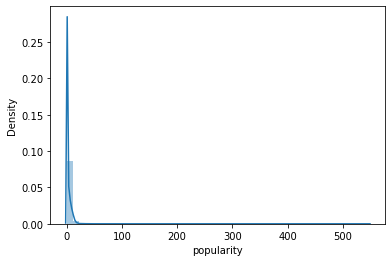

In [ ]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

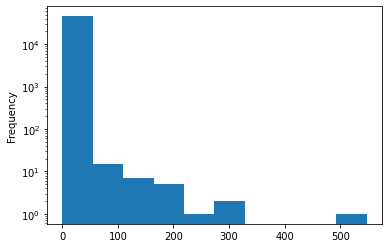

In [ ]:
df['popularity'].plot(logy=True, kind='hist')

The Popularity score seems to be an extremely skewed quentity with a mean of only **2.9** but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

##### **vote_count:**

In [ ]:
df['vote_count'].describe()

count    45535.000000
mean       109.791128
std        490.920864
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


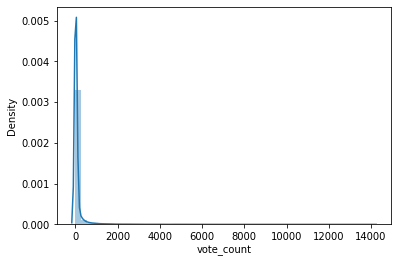

In [ ]:
sns.distplot(df['vote_count'].fillna(df['vote_count'].median()))
plt.show()

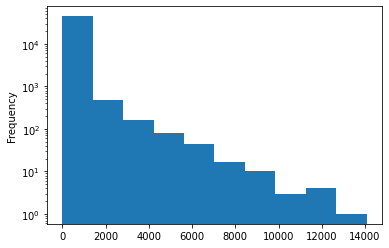

In [ ]:
df['vote_count'].plot(logy=True, kind='hist')

The distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,075. TMDB Votes, therefore, are not as potent and suggestive as its IMDB Counterpart.

##### **vote_average:**

In [ ]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42531.000000
mean         6.015053
std          1.255837
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


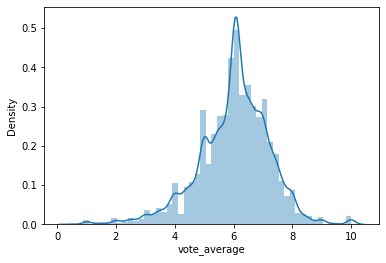

In [ ]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

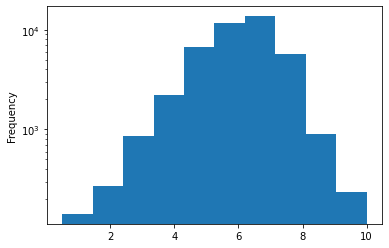

In [ ]:
df['vote_average'].plot(logy=True, kind='hist')

It appears that TMDB Users are extremely strict in their ratings. The mean rating is only a **5.6** on a scale of 10. Half the movies have a rating of less than or equal to 6. Let us check what the most critically acclaimed movies as per TMDB are. We will only consider those movies that have more than 2000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250).

##### **month and day:**
The most popular and most successful months and days.

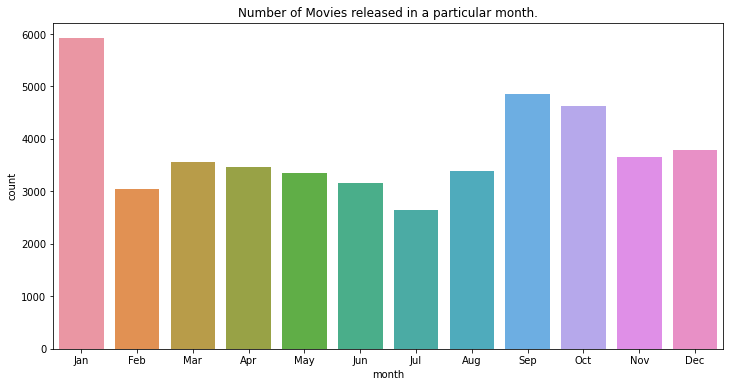

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

It appears that **January** is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the *the dump month* when sub par movies are released by the dozen. 

In which months do bockbuster movies tend to release? To answer this question, we will consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month.

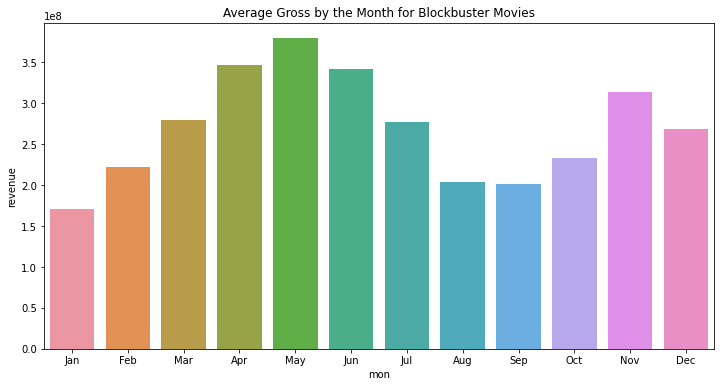

In [ ]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

We see that the months of **April**, **May** and **June** have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

Do some months tend to be more successful than others? Let us visualise the boxplot between the return and the months.

(0.0, 12.0)

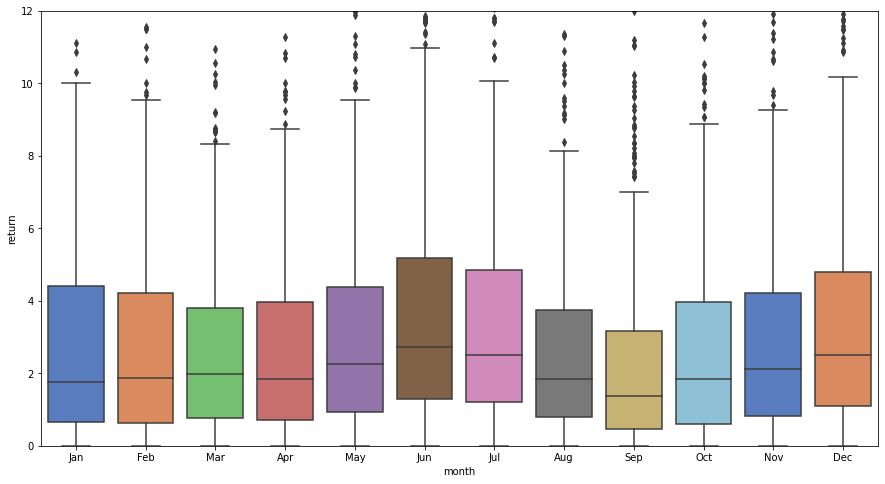

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

The months of **June** and **July** tend to yield the highest median returns. **September** is the least successful months on the aforementioned metrics. Again, the success of June and July movies can be attributed to them being summer months and times of vacation. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

Let us now have a look at the most popular days as we did for months.

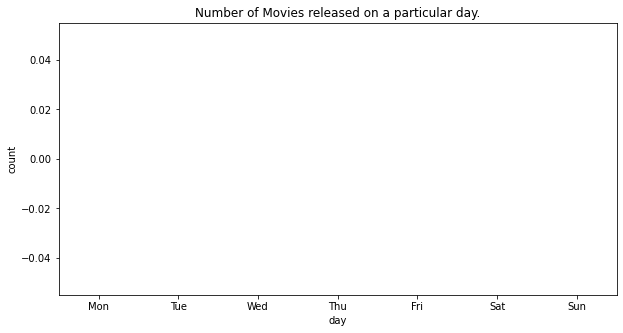

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

**Friday** is clearly the most popular day for movie releases. This is understandable considering the fact that it usually denotes the beginning of the weekend. **Sunday** and **Monday** are the least popular days and this can be attributed to the same aforementioned reason.

##### **year:**
The Dataset of 45,000 movies available to us does not represent the entire corpus of movies released since the inception of cinema. However, it is reasomnable to assume that it does include almost every major film released in Hollywood as well as other major film industries across the world (such as Bollywood in India). With this assumption in mind, let us take a look at the number of movies produced by the year.

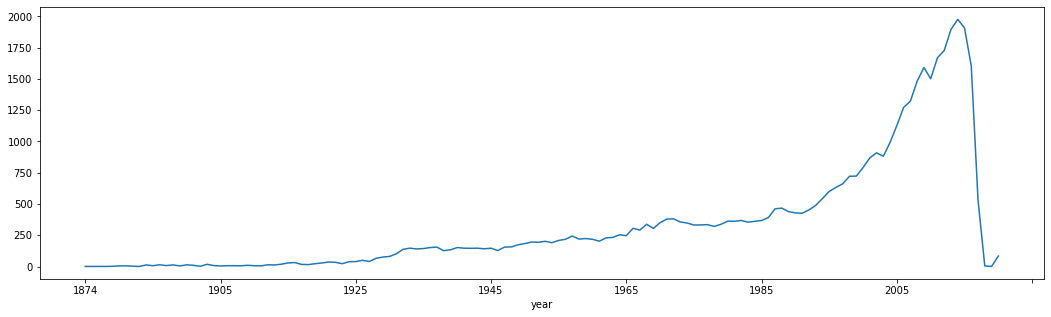

In [ ]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies **starting the 1990s decade.** However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

##### **runtime:**
From its humble beginnings of 1 minute slient, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time.

In [ ]:
df['runtime'].describe()

count    45278.000000
mean        94.128517
std         38.396184
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a **staggering 1256 minutes (or 20 hours) long.**

In [ ]:
df['runtime'] = df['runtime'].astype('float')

We are aware that most movies are less than 5 hours (or 300 minutes) long. Let us plot a distribution of these mainstream movies.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


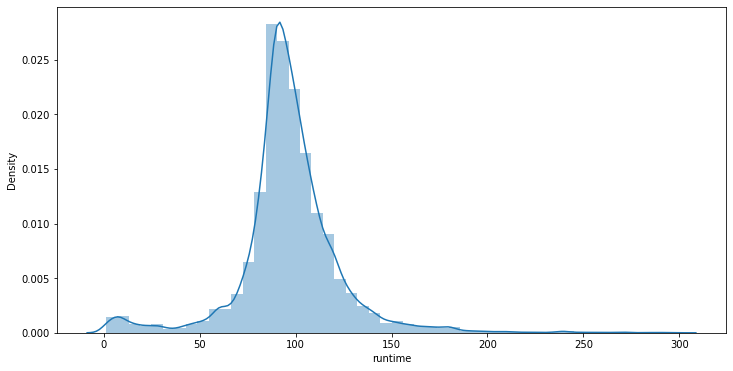

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

##### **budget:**

In [ ]:
df['budget'].describe()

count    8.912000e+03
mean     2.157988e+07
std      3.427843e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The mean budget of a film is 21.6 million dollars whereas the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


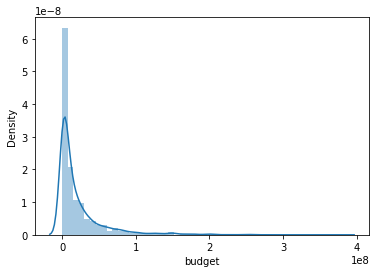

In [ ]:
sns.distplot(df[df['budget'].notnull()]['budget'])

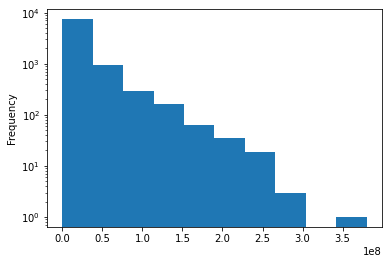

In [ ]:
df['budget'].plot(logy=True, kind='hist')

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars. Next, let us take a look at the most expensive movies of all time and the revenue & returns that they generated.

##### **revenue:**

In [ ]:
df['revenue'].describe()

count    7.428000e+03
mean     6.864948e+07
std      1.462517e+08
min      1.000000e+00
25%      2.384120e+06
50%      1.680970e+07
75%      6.713019e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is **68.7 million dollars** whereas the median gross is much lower at **16.8 million dollars**, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is **just 1 dollar** whereas the highest grossing movie of all time has raked in an astonishing **2.78 billion dollars.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


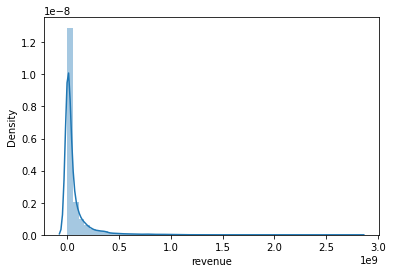

In [ ]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget. We also found that the two quantities were strongly correlated. Let us now take a look at the highest and least grossing movies of all time.

##### **Genres:**
genres will be converted into number of genres.

In [ ]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
gen_df = df.drop('genres', axis=1).join(s)

In [ ]:
gen_df['genre_list'].value_counts().shape[0]

20

TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.

In [ ]:
pop_gen = pd.DataFrame(gen_df['genre_list'].value_counts()).reset_index()
pop_gen.columns = ['genre_list', 'movies']
pop_gen.head(10)

,genre_list,movies
0,Drama,20312
1,Comedy,13196
2,Thriller,7640
3,Romance,6746
4,Action,6607
5,Horror,4679
6,Crime,4314
7,Documentary,3937
8,Adventure,3508
9,Science Fiction,3061


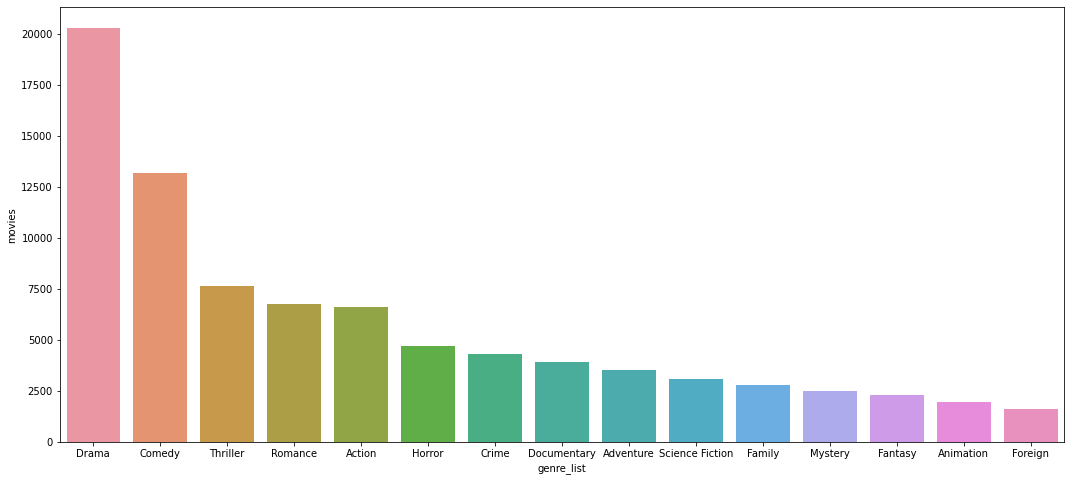

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

##### **actor:**
Actors with the Highest Total Revenue

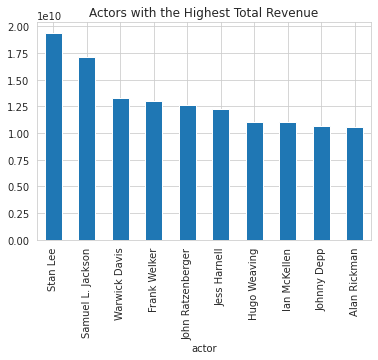

In [ ]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

##### **director:**
Directors with the Highest Total Revenue

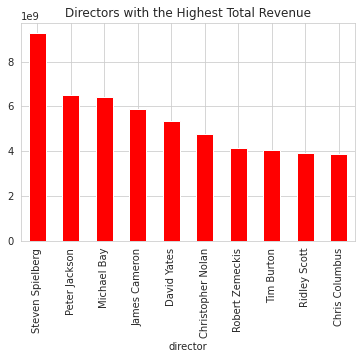

In [ ]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

### 3.B Dispersion and Outliers
Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers.

### 3.C Correlations
A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationships between two variables.

Several types of correlation coefficients exist, each with their own definition and own range of usability and characteristics. They have in common that they assume values in the range from −1 to +1, where +1 indicates the strongest possible agreement and −1 the strongest possible disagreement. By default Pandas adopts Pearson correlation.

##### **popularity and vote average:**
Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quanitties? Let us visualise their relationship in the form of a scatterplot.

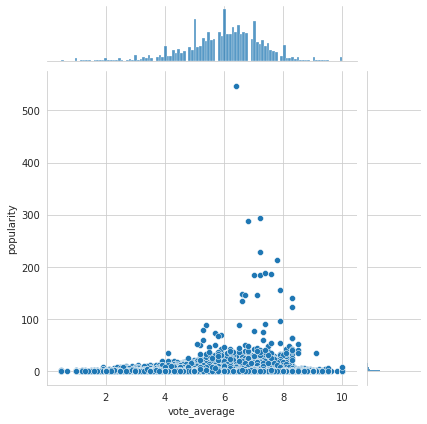

In [ ]:
sns.jointplot(x='vote_average', y='popularity', data=df)

Surprisingly, the Pearson Coefficient of the two aforementioned quantities is a measly **0.097** which suggests that **there is no tangible correlation**. In other words, popularity and vote average and independent quantities. It would be interesting to discover how TMDB assigns numerical popularity scores to its movies.

##### **vote_average and vote_count:**

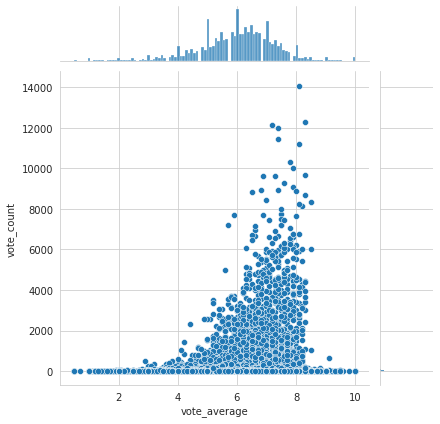

In [ ]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

There is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that the movie is good.

##### **runtime and return:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


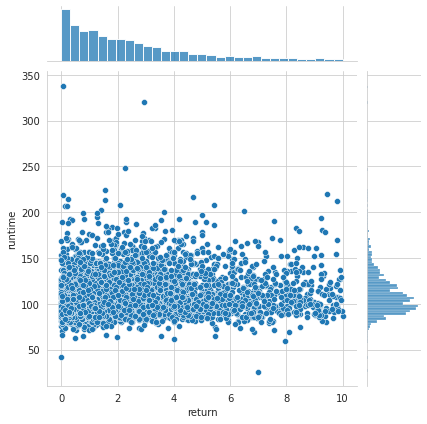

In [ ]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

There seems to be relationship between the two quantities. **The duration of a movie is independent of its success.** x

##### **runtime and budget:**
 However, I have a feeling this might not be the case with duration and budget. A longer movie should entail a higher budget. Let us find out if this is really the case.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


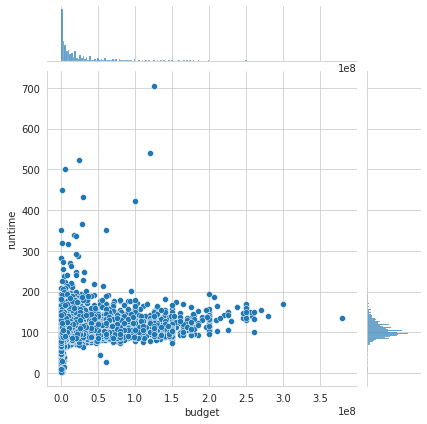

In [ ]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

The two quantities have a much weaker correlation than I had expected. In retrospect, the genre of the movie tends to have a much greater impact on budget. A 3 hour art film will cost significantly lesser than a 90 minute Sci-Fi movie. 

##### **budget and revenue:**
How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

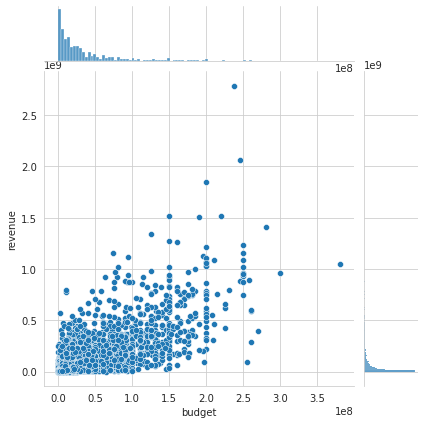

In [ ]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

The pearson r value of **0.73** between the two quantities indicates a very strong correlation. 

##### **correlation matrix:**

In [ ]:
df['year'] = df['year'].replace('NaT', np.nan)

In [ ]:
df['year'] = df['year'].apply(clean_numeric)

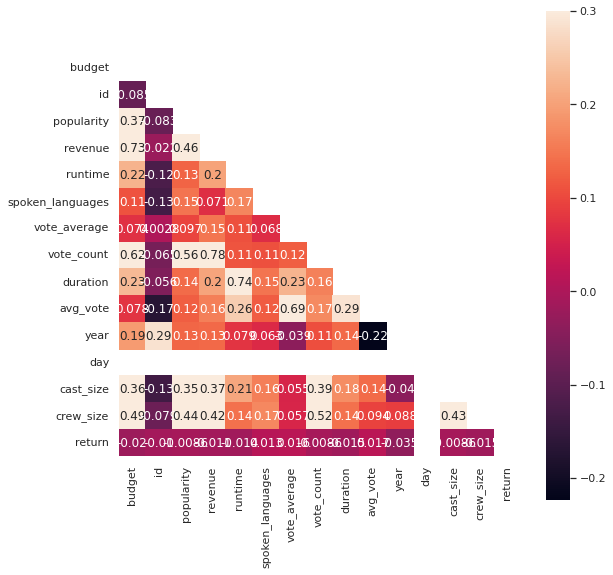

In [ ]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [ ]:
sns.set(font_scale=1.25)

# Regression: Predicting Movie Revenues

In [ ]:
rgf = df[df['return'].notnull()]
rgf.shape

(5393, 40)

We have **5393 records** in our training set. Let us take a look at the features we possess and remove the ones which are unnecessary.

In [ ]:
rgf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'avg_vote', 'budget_imdb', 'year',
       'day', 'month', 'cast', 'crew', 'cast_size', 'crew_size', 'return'],
      dtype='object')

In [ ]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return', 'crew'], axis=1)

**Feature engineering:**

1. **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.
2. **genres** will be converted into number of genres.
3. **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not.
4. **original_language** will be replaced by a feature called **is_foreign** to denote if a particular film is in English or a Foreign Language.
5. **production_companies** will be replaced with just the number of production companies collaborating to make the movie.
6. **production_countries** will be replaced with the number of countries the film was shot in.
7. **day** will be converted into a binary feature to indicate if the film was released on a Friday.
8. **month** will be converted into a variable that indicates if the month was a holiday season.

In [ ]:
s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'
gen_rgf = rgf.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre_list'].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [249]:
#rgf = revenue_df

In [252]:
#rgf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8810 entries, 0 to 45428
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     8810 non-null   int64  
 1   budget_tmdb                               8810 non-null   float64
 2   homepage                                  8810 non-null   int64  
 3   popularity                                8810 non-null   float64
 4   production_countries                      8810 non-null   int64  
 5   revenue                                   8810 non-null   float64
 6   runtime                                   8810 non-null   float64
 7   spoken_languages                          8810 non-null   int64  
 8   vote_average                              8810 non-null   float64
 9   vote_count                                8810 non-null   float64
 10  avg_vote                           

In [255]:
X, y = rgf.drop('revenue', axis=1), rgf['revenue']

In [253]:
#X, y = rgf.drop(['revenue','return'], axis=1), rgf['revenue']

In [254]:
rgf.columns, rgf.shape

(Index(['belongs_to_collection', 'budget_tmdb', 'homepage', 'popularity',
        'production_countries', 'revenue', 'runtime', 'spoken_languages',
        'vote_average', 'vote_count', 'avg_vote', 'votes', 'reviews_from_users',
        'reviews_from_critics', 'is_Animation', 'is_Comedy', 'is_Family',
        'is_Adventure', 'is_Fantasy', 'is_Romance', 'is_Drama', 'is_Action',
        'is_Crime', 'is_Thriller', 'is_Horror', 'is_History',
        'is_Science Fiction', 'is_Mystery', 'is_War', 'is_Foreign', 'is_Music',
        'is_Documentary', 'is_nan', 'is_Western', 'is_TV Movie', 'is_Musical',
        'is_Biography', 'is_Film-Noir', 'is_Sport', 'is_Carousel Productions',
        'is_Vision View Entertainment', 'is_Telescene Film Group Productions',
        'is_Sci-Fi', 'is_Aniplex', 'is_GoHands', 'is_BROSTA TV',
        'is_Mardock Scramble Production Committee', 'is_Sentai Filmworks',
        'is_Odyssey Media', 'is_Pulser Productions', 'is_Rogue State',
        'is_The Cartel', 'genr

In [ ]:
X = feature_engineering(X)

In [255]:
X.columns

Index(['belongs_to_collection', 'budget_tmdb', 'homepage', 'popularity',
       'production_countries', 'runtime', 'spoken_languages', 'vote_average',
       'vote_count', 'avg_vote', 'votes', 'reviews_from_users',
       'reviews_from_critics', 'is_Animation', 'is_Comedy', 'is_Family',
       'is_Adventure', 'is_Fantasy', 'is_Romance', 'is_Drama', 'is_Action',
       'is_Crime', 'is_Thriller', 'is_Horror', 'is_History',
       'is_Science Fiction', 'is_Mystery', 'is_War', 'is_Foreign', 'is_Music',
       'is_Documentary', 'is_nan', 'is_Western', 'is_TV Movie', 'is_Musical',
       'is_Biography', 'is_Film-Noir', 'is_Sport', 'is_Carousel Productions',
       'is_Vision View Entertainment', 'is_Telescene Film Group Productions',
       'is_Sci-Fi', 'is_Aniplex', 'is_GoHands', 'is_BROSTA TV',
       'is_Mardock Scramble Production Committee', 'is_Sentai Filmworks',
       'is_Odyssey Media', 'is_Pulser Productions', 'is_Rogue State',
       'is_The Cartel', 'genres_size', 'is_english',
 

In [256]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [257]:
X.shape, df.shape

((8810, 59), (45453, 24))

In [259]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.7827541822134345

We get a Coefficient of Determination of **0.78** which is a pretty score for the basic model that we have built. Let us compare our model's score to a Dummy Regressor.

In [ ]:
dummy = DummyRegressor()
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

We see that our model performs far more superiorly than the Dummy Regressor. Finally, let us plot the feature importances in the form of a bar plot to deduce which features were the most significant in our making predictions.

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

We notice that **vote_count**, a feature we *cheated* with, is the most important feature to our Gradient Boosting Model. This goes on to show the improtance of popularity metrics in determining the revenue of a movie. **Budget** was the second most important feature followed by **Popularity** (Literally, a popularity metric) and **Crew Size**.